## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [3]:
# 1) Loading Variables --

import pandas as pd
var_list = ['prestg10', 'educ', 'race', 'mawrkgrw', 'unrelat', 'colath', 'popular', 'divlaw', 'letdie1', 'helpfulv'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

**2) Short Description of the data you chose and why:**

Many of the variables we picked were from controversial questions that attacked or related to specific American values ranging from work ethic, family values, community, work competition, and medical decisions. This data goes beyond the staple demographic data and reveals more about both the ideology and environments of a number of Americans that build up their beliefs and perspectives. We tried to pick a range of variables that touched on various aspects of life including the relationships indivdiuals have with their community, their home life, experinces at work, and their own children. One of the variables that particularly stood out was a question about having a working mother during an individual's teens. This variable was particularly interesting to me as it revealed a bias in the questions on the survey. Some of the variables, the more controversial ones, were chosen for this similar reason.

In [4]:
# 3) Load the Data and do clean up
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
gss_df = pd.read_csv("selected_gss_data.csv")

# display basic information -- to help analyze what needs to be cleaned
print(gss_df.info())
print(gss_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72390 entries, 0 to 72389
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   prestg10  67248 non-null  float64
 1   educ      72127 non-null  float64
 2   race      72283 non-null  object 
 3   mawrkgrw  39141 non-null  object 
 4   unrelat   49369 non-null  float64
 5   colath    44800 non-null  object 
 6   popular   31807 non-null  object 
 7   divlaw    38623 non-null  object 
 8   letdie1   35537 non-null  object 
 9   helpfulv  1927 non-null   object 
dtypes: float64(3), object(7)
memory usage: 5.5+ MB
None
   prestg10  educ   race mawrkgrw  unrelat                 colath popular  \
0      45.0  16.0  white      NaN      NaN  yes, allowed to teach     NaN   
1      50.0  10.0  white      NaN      0.0            not allowed     NaN   
2      49.0  12.0  white      NaN      0.0            not allowed     NaN   
3      60.0  17.0  white      NaN      0.0            not 

In [5]:
# Cleaning up data: first step - handling significant missing values

# Column has over 97% missing values, not helpful in doing any sort of analysis for this column
gss_df.drop(columns=["helpfulv"], inplace=True)
# Getting rid of columns that are missing and replace missing values with median values
gss_df.dropna(subset=["prestg10", "educ", "race"], inplace=True)
gss_df["prestg10"].fillna(df["prestg10"].median(), inplace=True)
gss_df["unrelat"].fillna(df["unrelat"].median(), inplace=True)
# Replace categorical variables with Unknown for missing values
gss_df.fillna({"mawrkgrw": "Unknown", "colath": "Unknown", "popular": "Unknown",
           "divlaw": "Unknown", "letdie1": "Unknown"}, inplace=True)
# Save the cleaned data into a sperate csv file
gss_df.to_csv("gss_cleaned.csv", index=False)

**Part 4 - Data Visualization:**

Numeric Summary:
           prestg10          educ       unrelat
count  66960.000000  66960.000000  66960.000000
mean      43.298327     13.157616      0.099298
std       13.082343      3.145397      0.431768
min       16.000000      0.000000      0.000000
25%       33.000000     12.000000      0.000000
50%       43.000000     13.000000      0.000000
75%       50.000000     16.000000      0.000000
max       80.000000     20.000000      8.000000


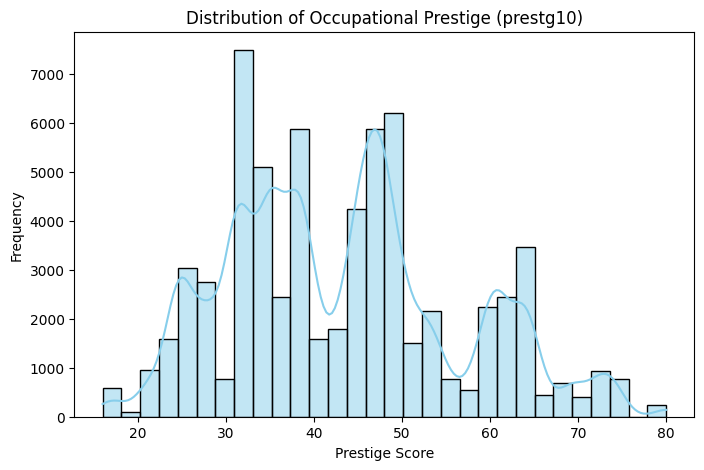

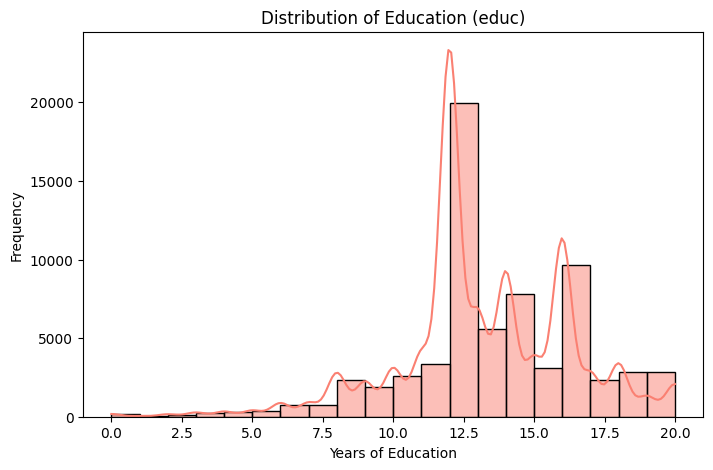

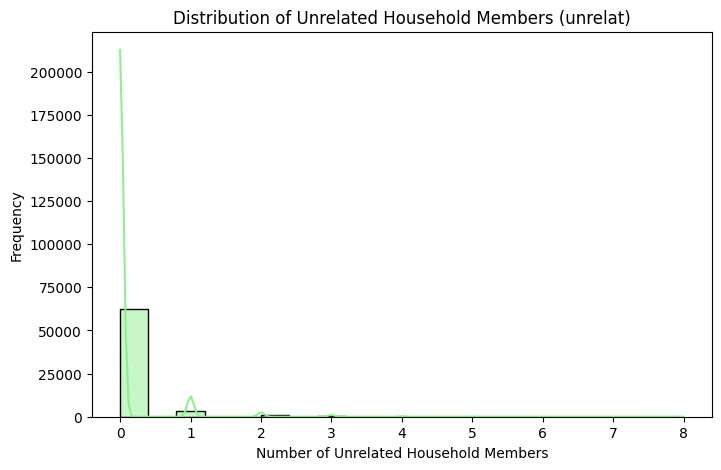

C:\Users\Sanket\AppData\Local\Temp\ipykernel_24648\2376349863.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=gss_df, x=var, order=order, palette='viridis')


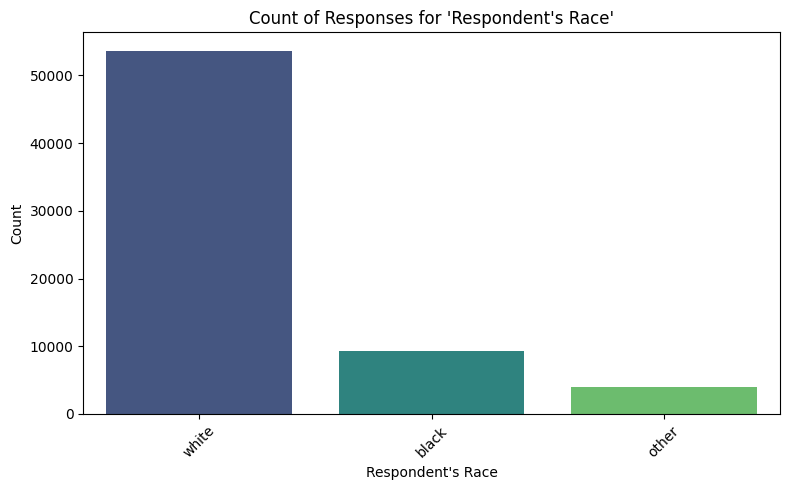

C:\Users\Sanket\AppData\Local\Temp\ipykernel_24648\2376349863.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=gss_df, x=var, order=order, palette='viridis')


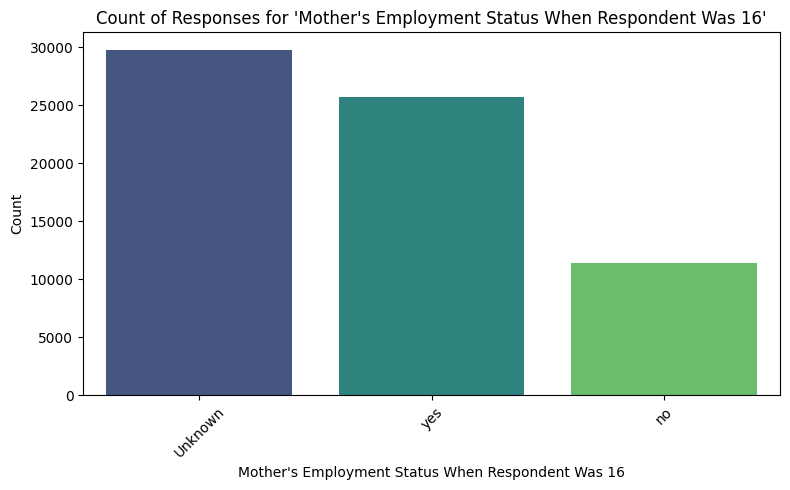

C:\Users\Sanket\AppData\Local\Temp\ipykernel_24648\2376349863.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=gss_df, x=var, order=order, palette='viridis')


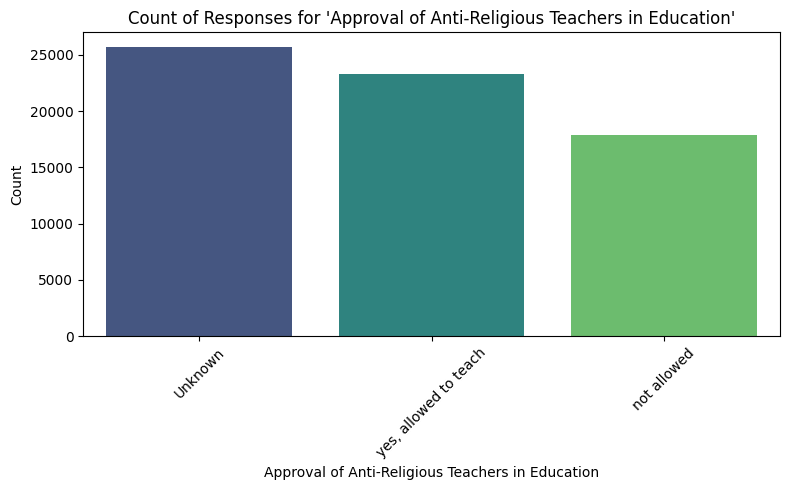

C:\Users\Sanket\AppData\Local\Temp\ipykernel_24648\2376349863.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=gss_df, x=var, order=order, palette='viridis')


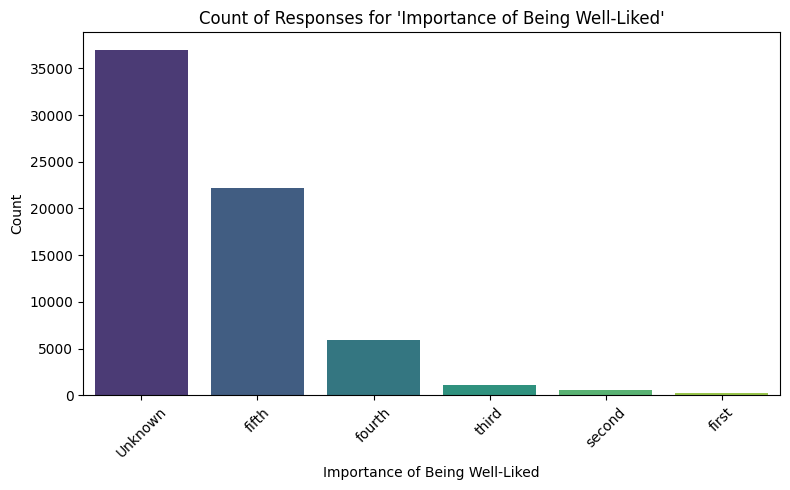

C:\Users\Sanket\AppData\Local\Temp\ipykernel_24648\2376349863.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=gss_df, x=var, order=order, palette='viridis')


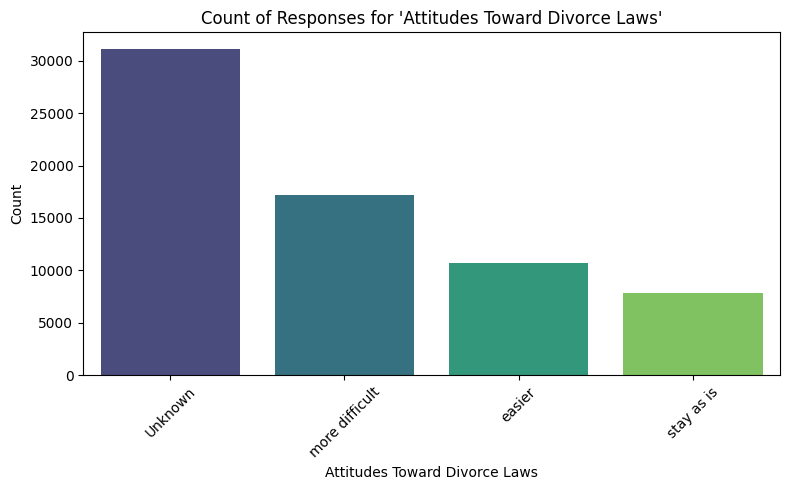

C:\Users\Sanket\AppData\Local\Temp\ipykernel_24648\2376349863.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=gss_df, x=var, order=order, palette='viridis')


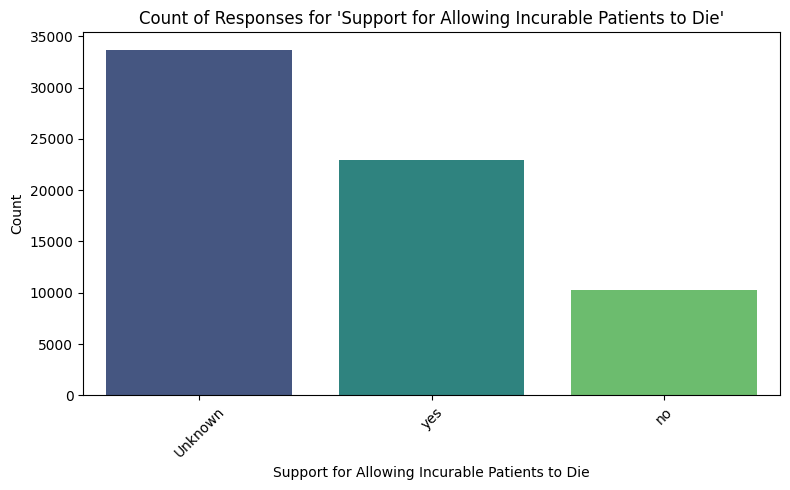

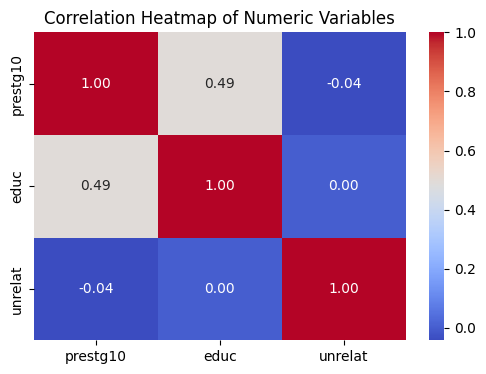

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the cleaned data
gss_df = pd.read_csv("gss_cleaned.csv")

# numeric summaries for continuous variables
numeric_vars = ['prestg10', 'educ', 'unrelat']
print("Numeric Summary:")
print(gss_df[numeric_vars].describe())

# histograms for the numeric variables
plt.figure(figsize=(8,5))
sns.histplot(gss_df['prestg10'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Occupational Prestige (prestg10)")
plt.xlabel("Prestige Score")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(gss_df['educ'], kde=True, bins=20, color='salmon')
plt.title("Distribution of Education (educ)")
plt.xlabel("Years of Education")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(gss_df['unrelat'], kde=True, bins=20, color='lightgreen')
plt.title("Distribution of Unrelated Household Members (unrelat)")
plt.xlabel("Number of Unrelated Household Members")
plt.ylabel("Frequency")
plt.show()


# dictionary to map original column names to improved titles for categorical variables
plot_titles = {
    'race': "Respondent's Race",
    'mawrkgrw': "Mother's Employment Status When Respondent Was 16",
    'colath': "Approval of Anti-Religious Teachers in Education",
    'popular': "Rank of Importance of Being Well-Liked",
    'divlaw': "Attitudes Toward Divorce Laws",
    'letdie1': "Support for Allowing Incurable Patients to Die"
}

# use the keys from the dictionary as the list of categorical variables
categorical_vars = list(plot_titles.keys())

# bar graphs for categorical variables using the dictionary
for var in categorical_vars:
    plt.figure(figsize=(8,5))
    order = gss_df[var].value_counts().index  # order bars by frequency
    sns.countplot(data=gss_df, x=var, order=order, palette='viridis')
    plt.title(f"Count of Responses for '{plot_titles[var]}'")
    plt.xlabel(plot_titles[var])
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# correlation heatmap for numeric variables
plt.figure(figsize=(6,4))
corr_matrix = gss_df[numeric_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()


**Part 5 - Findings:**

Our analysis of the numeric variables shows a mix of expected and surprising patterns. The distribution of occupational prestige looks somewhat Gaussian,  and it has two noticeable peaks. One is near a prestige score of 35 and another is at a score of under 50. This indicates that a good number of respondents tend to fall around these two ranges. On the other hand, the distribution of education is not as symmetric. It is left-skewed and has its highest frequency around 12.5 years of education, which suggests that most respondents have completed around a high school level of education, or a bit more. The distribution of unrelated household members is very right-skewed, with most of the respondents saying they have 0 unrelated household members. This suggests that most people live with relatives rather than with non-relatives, which isn't very surprising. When we look at the categorical variables through bar graphs, a few themes emerge. Most respondents identify as white, which aligns with broader population trends, but it also makes us consider whether diversity is taken into account when surveys are conducted. For the question about a mother's employment status when the respondent was 16, responses are nearly split between "yes" and "unknown," with a slightly higher count for unknown responses. A similar pattern is seen for the approval of anti-religious teachers in education, where the responses are almost evenly divided between "yes" and "unknown", but favoring "unknown". The large number of "unknown" responses in these areas suggests that many respondents may have either chosen not to answer the question or that the question may have been ambiguous, which can affect the strength of any conclusions drawn from these surveys.

The categorical variables highlight further insights into the respondents’ attitudes. For the importance of being well liked, the most frequent response is "unknown." Following this, respondents show a decrease in frequency from lower rankings, with "fifth" appearing next in the order of choices, then "fourth", "third", "second", and finally the "first" rank. This suggests that a lot of respondents may have not answered the question and those who did don't hold much importance for popularity. The responses to whether divorce laws should be harder or easier also show a pattern of uncertainty. "unknown" was the most common response, followed by a majority favoring more difficult divorce laws, with fewer respondents selecting "easier" or "stay the same." For the question regarding support for allowing incurable patients to die, most responses fell under "unknown". Those who did respond tended to favor "yes" over "no." These high levels of unknown responses across several variables suggest that many participants either felt uncertain or weren't willing to provide clear opinions on sensitive or controversial topics. Furthermore, the correlation heatmap for the numeric variables indicates that there is no strong correlation among most variables. The highest correlation that we can see is between education and occupational prestige, with a moderate positive value of 0.49. This suggests that higher levels of education are somewhat associated with higher prestige scores. Overall, while some trends are visible, the abundance of unknown responses means that the data should be interpreted with caution and a grain of salt.